# Traffic I-94 patterns


This project is about determining a few indicators of heavy traffic on I-94. Indicators such as: weather type, time of the day, time of the week, etc. We will try to find out when the traffic is usually heavier (ex:in the summer or when it snows).

In [1]:
import pandas as pd
traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print(traffic.tail(5))
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

Let's analyze the traffic volume column.

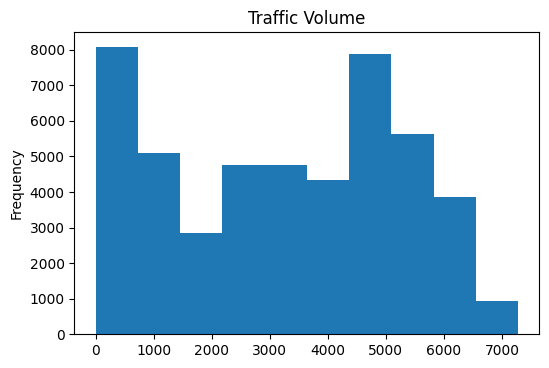

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume')
plt.show()
traffic['traffic_volume'].describe()



From the statistics, it shows that traffic volume varies between 0 to 7280 cars, with 25% 1193 cars or less and 75% four times that number. It is interesting now to see when these patterns occur, where it is daytime or nightime as well as what day of the week it happens.

In [3]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])
traffic.head()
daytime_traffic=traffic[(traffic['date_time'].dt.hour<=19) & (traffic['date_time'].dt.hour>=7)]
nighttime_traffic=traffic[(traffic['date_time'].dt.hour>19) | (traffic['date_time'].dt.hour<7)]
g=traffic['date_time'].dt.hour
len(nighttime_traffic)


22366

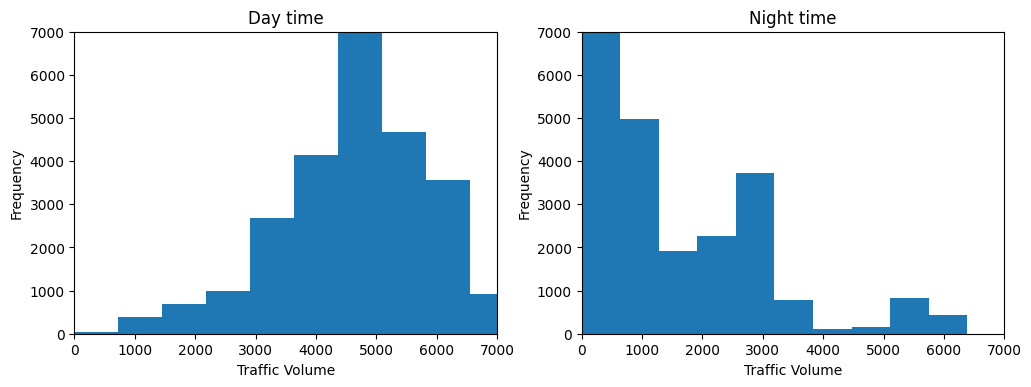

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(daytime_traffic['traffic_volume'])
plt.title('Day time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,7000])
plt.subplot(1,2,2)
plt.hist(nighttime_traffic['traffic_volume'])
plt.title('Night time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,7000])
plt.show()

In [5]:
daytime_traffic.describe()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,25838.000000,25838.000000,25838.000000,25838.000000,25838.000000
mean,282.347796,0.502320,0.000234,53.040135,4649.292360
std,13.302562,61.167614,0.008511,37.590946,1202.321987
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.720000,0.000000,0.000000,5.000000,4021.000000
50%,283.867000,0.000000,0.000000,75.000000,4736.000000
75%,293.610000,0.000000,0.000000,90.000000,5458.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
nighttime_traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,22366.000000,22366.000000,22366.000000,22366.000000,22366.000000
mean,279.886677,0.140120,0.000209,45.113386,1654.648484
std,13.257728,1.125004,0.007752,40.183455,1425.175292
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.580000,0.000000,0.000000,1.000000,486.000000
50%,281.150000,0.000000,0.000000,40.000000,1056.500000
75%,290.400000,0.000000,0.000000,90.000000,2630.750000
max,306.290000,55.630000,0.510000,100.000000,6386.000000


Based on the histograms and the means of both data sets. The heaviest traffic is in the daytime. Therefore we can focus on it.

Now we can further investigate based on the month, day and time of day.

<ipython-input-7-4bfadbec1fe9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



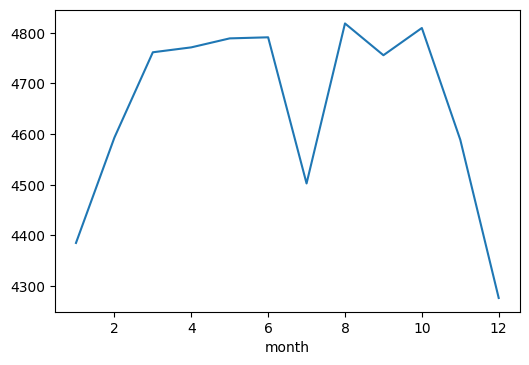

In [7]:
daytime_traffic['month']=daytime_traffic['date_time'].dt.month
by_month=daytime_traffic.groupby('month').mean()
by_month['traffic_volume'].plot.line()

It is interesting to see that the traffic heaviness drops in July. It see,s to be slower around winter, then higher in summer except for July.

We will now look into what the traffic looks like every day of the week.

<ipython-input-10-32221100fbb2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



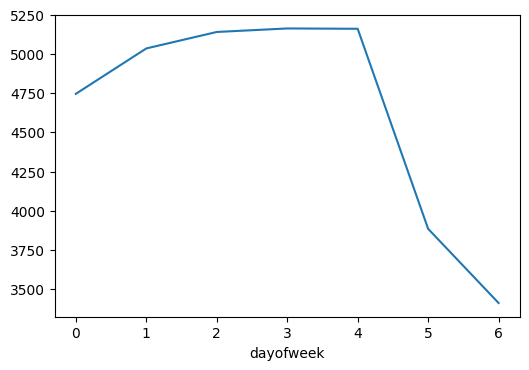

In [10]:
daytime_traffic['dayofweek']=daytime_traffic['date_time'].dt.dayofweek
by_dayofweek=daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()

Where 0 is Monday.The busiest days of the week are weekdays especially Friday then weekends traffic significantly falls.

In [11]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-11-f3f666925a13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



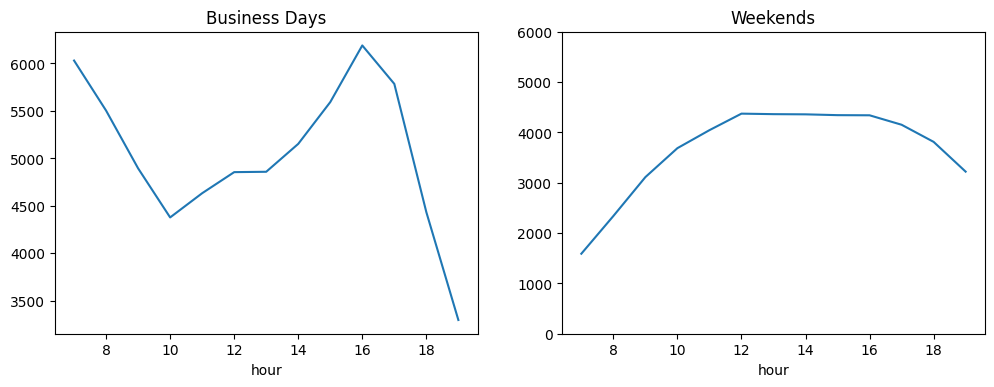

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days')
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekends')
plt.ylim([0,6000])
plt.show()

Both figures show different and expected outcomes where during business days, people tend to leave all leave early then stay inside till their jobs are done then the work exit time causes another traffic spike. This shows the work rush hours (7 and 16) and possibly suggest different work styles for better traffic going forward. As for weekends, people tend to be more relaxed about when to leave their homes and the rush hour is shifted to 12 which is lunch time for most households.

Now let's look at the correlation of other factors to traffic such as weather.

# Weather Factor

In [19]:
daytime_traffic.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

The correlation numbers show strong correlation between traffic and the day of the week followed by the temperature.

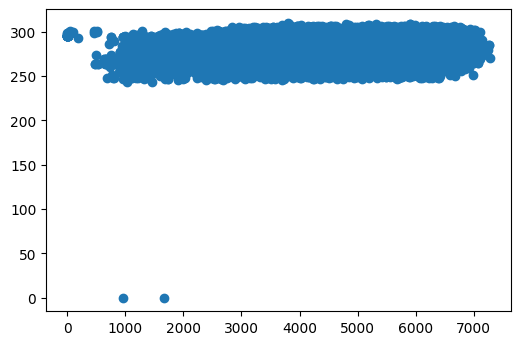

In [20]:
plt.scatter(daytime_traffic['traffic_volume'],daytime_traffic['temp'])

The uniform distribution shows that temperature is not a reliable indicator of the weather.

In [22]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_description = daytime_traffic.groupby('weather_description').mean()

Now we plot traffic with more weather indicators by grouping data and using the mean as an aggregate function.

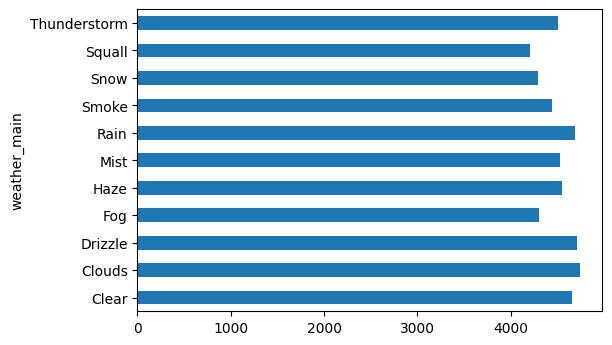

In [25]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

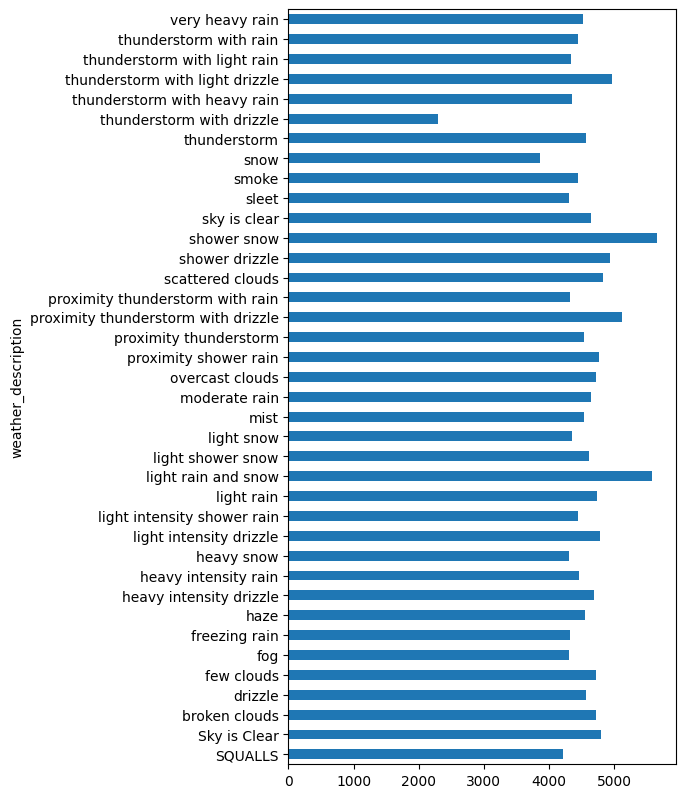

In [27]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

In both data measures the cars barely exceeded 5000 cars except for 1) light rain and snow, 2)Snow Showers and 3) proximity thunderstorm with drizzle.

# Conclusions

In this analysis: It is shown that traffic gets affected by:
1) Time Variation: 
-Day of the week
-Hour within weekdays
-Month of the year
2) Weather Variations:
-Light rain and snow
-Snow showers
-Proximity Thunderstorm with drizzle.